In [2]:
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB.csv


In [4]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['FB.csv']), index_col='Date', parse_dates=True)
df = df.dropna()
print('Shape of data', df.shape)
df

Shape of data (2159, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2020-12-09,287.630005,271.750000,283.660004,277.920013,25189700,277.920013
2020-12-10,278.730011,271.859985,275.540009,277.119995,20065100,277.119995
2020-12-11,276.480011,270.250000,274.529999,273.549988,14391400,273.549988


In [8]:
df1=df.reset_index()['Close']
# df1 = df['Close']
df1

0        38.230000
1        34.029999
2        31.000000
3        32.000000
4        33.029999
           ...    
2154    277.920013
2155    277.119995
2156    273.549988
2157    274.190002
2158    275.549988
Name: Close, Length: 2159, dtype: float64

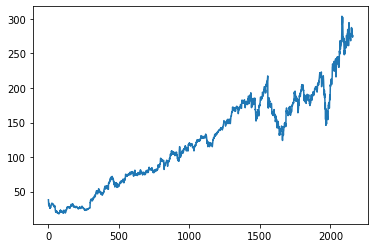

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)
# df['Close'].plot(figsize=(12,5))

In [10]:
import numpy as np 

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(2159, 1)

In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
# test_size=len(df1)-training_size
test_size=int(len(df1)*.1)
dataset_length = training_size+test_size
train_data,test_data=df1[0:training_size],df1[training_size:dataset_length]

In [31]:
training_size, test_size

(1619, 215)

In [34]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----149   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3...t+149 and Y=t+150
time_step = 150
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [40]:
print(x_train.shape), print(y_train.shape)

(1468, 150)
(1468,)


(None, None)

In [42]:
print(x_test.shape), print(y_test.shape)

(64, 150)
(64,)


(None, None)

In [20]:
import tensorflow as tf

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [44]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 327ms/step - loss: 0.0508 - val_loss: 0.0019
Epoch 2/100
23/23 [==============================] - 6s 249ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 3/100
23/23 [==============================] - 6s 245ms/step - loss: 5.8927e-04 - val_loss: 0.0014
Epoch 4/100
23/23 [==============================] - 6s 258ms/step - loss: 4.2695e-04 - val_loss: 0.0014
Epoch 5/100
23/23 [==============================] - 6s 249ms/step - loss: 3.9374e-04 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 6s 254ms/step - loss: 4.0214e-04 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 6s 253ms/step - loss: 3.8297e-04 - val_loss: 0.0014
Epoch 8/100
23/23 [==============================] - 6s 252ms/step - loss: 3.4911e-04 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 6s 259ms/step - loss: 3.6736e-04 - val_loss: 0.0014
Epoch 10/100
23/23 [==============================] - 6s 255ms

In [ ]:
# import tensorflow as tf

In [27]:
tf.__version__

'2.4.1'

In [48]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

117.58976645612404

In [51]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

190.60540102443582

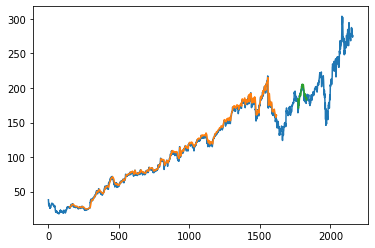

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
testPredictPlot[len(train_predict)+(look_back*2)+1:dataset_length-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [61]:
len(test_data)

215

In [221]:
x_input=test_data[len(test_data)-150:].reshape(1,-1)
x_input.shape

(1, 150)

In [222]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [223]:
# demonstrate prediction for next 30 days
from numpy import array

nod=60
lst_output=[]
n_steps=150
i=0
while(i<nod):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.5911712646484375], [0.5931451320648193], [0.5959958434104919], [0.5989506840705872], [0.601697564125061], [0.6041867136955261], [0.6064705848693848], [0.6086336970329285], [0.610765278339386], [0.6129478216171265], [0.6152464747428894], [0.6177055239677429], [0.6203449368476868], [0.623162567615509], [0.626136302947998], [0.6292293667793274], [0.6323966979980469], [0.6355902552604675], [0.6387646198272705], [0.6418809294700623], [0.6449103951454163], [0.6478346586227417], [0.6506463289260864], [0.6533480286598206], [0.6559491753578186], [0.6584650874137878], [0.6609113216400146], [0.6633044481277466], [0.6656574606895447], [0.6679787635803223], [0.6702730655670166], [0.672539472579956], [0.6747727394104004], [0.6769651174545288], [0.6791068911552429], [0.6811879873275757], [0.6831986904144287], [0.6851319074630737], [0.6869823336601257], [0.6887475252151489], [0.6904276013374329], [0.6920251846313477], [0.6935440897941589], [0.6949895024299622], [0.696366548538208], [0.697680354118

In [224]:
day_new=np.arange(1,151)
day_pred=np.arange(151,151+nod)

In [219]:
# len(scaler.inverse_transform(df1[4014:]).flatten())
len(day_pred)

60

In [214]:
import matplotlib.pyplot as plt

In [215]:
# scaler.inverse_transform(lst_output)
dataset_length

1834

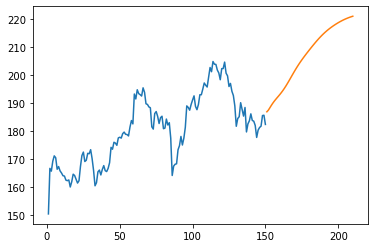

In [225]:
plt.plot(day_new,scaler.inverse_transform(df1[dataset_length-150:dataset_length]).flatten())
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [226]:
df3=df1[1000:dataset_length].tolist()
df3.extend(lst_output)
# plt.plot(df3[500:])
df3=scaler.inverse_transform(df3).tolist()
df4=df1[1000:dataset_length+100]
df4=scaler.inverse_transform(df4)

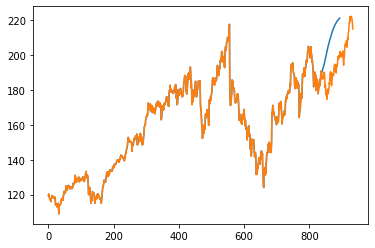

In [227]:
plt.plot(df3)
plt.plot(df4) # actual - orange

In [206]:
# df4=scaler.inverse_transform(lst_output)
# df4[-1]

array([221.70812877])